In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = pd.read_csv("Cleaned-Telco-Dataset.csv")

In [ ]:
data.head()

,Unnamed: 0,TotalCharges,tenure,MonthlyCharges,MultipleLines_No phone service,SeniorCitizen,Contract_One year,PaymentMethod_Credit card (automatic),InternetService_No,PaymentMethod_Bank transfer (automatic),PaymentMethod_Mailed check,Contract_Two year,Churn,OnlineSecurity_Yes,TechSupport_Yes
0,0,29.85,1,29.85,1,0,0,0,0,0,0,0,0,0,0
1,1,1889.50,34,56.95,0,0,1,0,0,0,1,0,0,1,0
2,2,108.15,2,53.85,0,0,0,0,0,0,1,0,1,1,0
3,3,1840.75,45,42.30,1,0,1,0,0,1,0,0,0,1,1
4,4,151.65,2,70.70,0,0,0,0,0,0,0,0,1,0,0


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

In [ ]:
X = data.drop('Churn', axis = 1)
y = data['Churn'] 

Logistic Regression

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = 42)

In [ ]:
lm = LogisticRegression()
lm.fit(X_train, y_train)
y_pred = lm.predict(X_test)

lm_accuracy = round(lm.score(X_test, y_test) * 100, 2)
print('Test Accuracy: ', lm_accuracy)

Test Accuracy:  80.38


In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[1875  194]
 [ 359  390]]


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.91      0.87      2069
           1       0.67      0.52      0.59       749

    accuracy                           0.80      2818
   macro avg       0.75      0.71      0.73      2818
weighted avg       0.79      0.80      0.80      2818



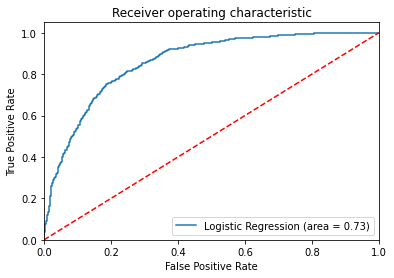

In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()